In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
#### Import the libraries/packages
import numpy as np
import pandas as pd
import math
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# get the stock quote
df = yf.download('INCO.JK', data_source ='yahoo', start = '2022-03-12', end = '2022-08-12')
#show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-14,6125.0,6150.0,5700.0,5700.0,5700.0,37807200
2022-03-15,5500.0,5850.0,5500.0,5600.0,5600.0,32818500
2022-03-16,5750.0,5750.0,5450.0,5600.0,5600.0,21170000
2022-03-17,5600.0,5700.0,5525.0,5575.0,5575.0,14352700
2022-03-18,5600.0,5850.0,5600.0,5800.0,5800.0,26057800
...,...,...,...,...,...,...
2022-08-05,6125.0,6200.0,6025.0,6100.0,6100.0,17870000
2022-08-08,6100.0,6325.0,6050.0,6325.0,6325.0,15268000
2022-08-09,6450.0,6800.0,6350.0,6750.0,6750.0,37749600


In [4]:
df.shape

(99, 6)

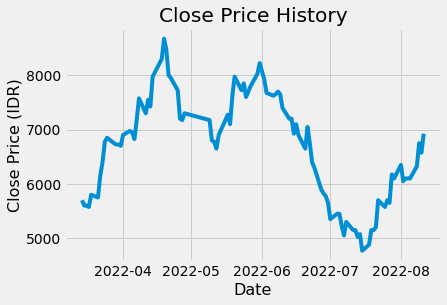

In [5]:
#visualize the closing price history
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Close Price (IDR)', fontsize = 16)
# Plotting a figure of width 6 and height 3
## plt_stocks = plt.figure(figsize=(, 700))
plt.show()

In [6]:
# Create a new dataframe 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

80

In [7]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.23815621],
       [0.21254802],
       [0.21254802],
       [0.20614597],
       [0.2637644 ],
       [0.25096031],
       [0.35339309],
       [0.41741357],
       [0.5134443 ],
       [0.53265045],
       [0.50704225],
       [0.5006402 ],
       [0.5006402 ],
       [0.49423816],
       [0.54545455],
       [0.56466069],
       [0.55825864],
       [0.5262484 ],
       [0.61587708],
       [0.71830986],
       [0.64788732],
       [0.71190781],
       [0.67989757],
       [0.82074264],
       [0.90396927],
       [1.        ],
       [0.94878361],
       [0.82714469],
       [0.81434059],
       [0.75672215],
       [0.62227913],
       [0.61587708],
       [0.64788732],
       [0.61587708],
       [0.51984635],
       [0.5134443 ],
       [0.48143406],
       [0.54545455],
       [0.64148528],
       [0.59667093],
       [0.73111396],
       [0.82074264],
       [0.75672215],
       [0.78873239],
       [0.72471191],
       [0.7759283 ],
       [0.83354673],
       [0.884

In [8]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.23815621, 0.21254802, 0.21254802, 0.20614597, 0.2637644 ,
       0.25096031, 0.35339309, 0.41741357, 0.5134443 , 0.53265045,
       0.50704225, 0.5006402 , 0.5006402 , 0.49423816, 0.54545455,
       0.56466069, 0.55825864, 0.5262484 , 0.61587708, 0.71830986,
       0.64788732, 0.71190781, 0.67989757, 0.82074264, 0.90396927,
       1.        , 0.94878361, 0.82714469, 0.81434059, 0.75672215,
       0.62227913, 0.61587708, 0.64788732, 0.61587708, 0.51984635,
       0.5134443 , 0.48143406, 0.54545455, 0.64148528, 0.59667093,
       0.73111396, 0.82074264, 0.75672215, 0.78873239, 0.72471191,
       0.7759283 , 0.83354673, 0.88476312, 0.80793854, 0.74391805,
       0.73111396, 0.73751601, 0.7503201 , 0.73751601, 0.67349552,
       0.62227913, 0.62227913, 0.55185659, 0.59667093, 0.54545455])]
[0.4814340588988475]

[array([0.23815621, 0.21254802, 0.21254802, 0.20614597, 0.2637644 ,
       0.25096031, 0.35339309, 0.41741357, 0.5134443 , 0.53265045,
       0.50704225, 0.5006402 , 0.500

In [9]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(20, 60, 1)

In [11]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

20/20 [==============================] - 3s 18ms/step - loss: 0.0171


In [14]:
# Create the testing data set
# Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [15]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [16]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
# Get the root mean square errors (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

800.5044973273026

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


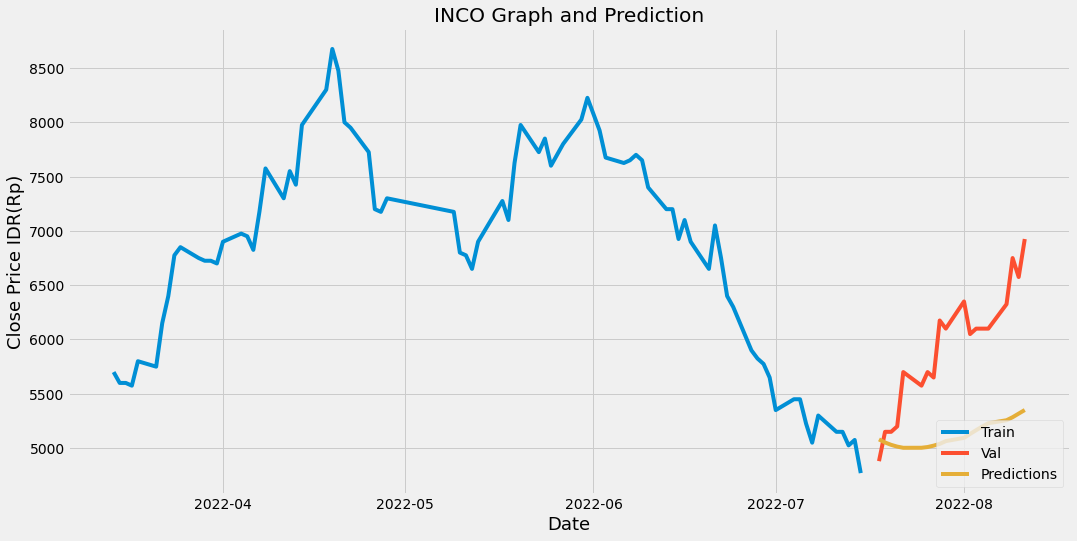

In [19]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('INCO Graph and Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR(Rp)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
# Show the valid and prediction prices
valid

,Close,Predictions
Date,,
2022-07-18,4880.0,5080.163086
2022-07-19,5150.0,5051.837891
2022-07-20,5150.0,5030.081055
2022-07-21,5200.0,5013.813965
2022-07-22,5700.0,5002.869629
2022-07-25,5575.0,5003.182129
2022-07-26,5700.0,5009.845215
2022-07-27,5650.0,5022.747070
2022-07-28,6175.0,5038.941406


In [22]:
# Get the quotes
inco_quote = yf.download('INCO.JK', data_source ='yahoo', start = '2022-03-12', end = '2022-08-12')
# Create a new dataframe
new_df = inco_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_day_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days 
X_test.append(last_60_day_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[5388.1143]]


In [23]:
# Get the quote
inco_quote_close = yf.download('INCO.JK', data_source ='yahoo', start = '2022-08-12', end = '2022-08-12')
print(inco_quote_close['Close'])

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- INCO.JK: No data found for this date range, symbol may be delisted
Series([], Name: Close, dtype: float64)
